In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import pysal.lib as lps
import pysal.explore.esda as esda

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

c:\users\aldrin\desktop\pyprojects\testenv\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
c:\users\aldrin\desktop\pyprojects\testenv\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
def moran_scatterplot(y,lag_val):
    b, a = np.polyfit(y, lag_val, 1)
    f, ax = plt.subplots(1, figsize=(9, 9))
    plt.scatter(y, lag_val)
    plt.vlines(y.mean(), lag_val.min(), lag_val.max(), linestyle='--')
    plt.hlines(lag_val.mean(), y.min(), y.max(), linestyle='--')
    plt.plot(y, a + b*y, 'r')
    plt.title('Moran Scatterplot')
    plt.ylabel('Spatial Lag')
    plt.xlabel('Variable')
    plt.show()
    
def calculate_cluster(y,wq,not_island):
    li = esda.moran.Moran_Local(y, wq)
    sig = 1 * (li.p_sim < 0.05) * not_island
    hotspot = 1 * (sig * li.q==1)
    coldspot = 3 * (sig * li.q==3)
    lowoutlier = 2 * (sig * li.q==2)
    highoutlier = 4 * (sig * li.q==4)
    spots = hotspot + coldspot + lowoutlier + highoutlier
    return spots

def plot_cluster_map(df):
    hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
    fig, ax = plt.subplots(1, figsize=(9, 9))
    df.assign(cl=labels).plot(column='cl', categorical=True, \
                              k=2, cmap=hmap, linewidth=0.1, ax=ax, \
                              edgecolor='white',  legend=True,
                              legend_kwds={'loc': 'lower right'})
    plt.show()

In [3]:
pop_df = pd.read_excel('data/Population 2010, 2015 ARMM,BCT.xlsx',
                       usecols=['PSGC_BRGY','Pop2015'])
pop_df = pop_df.rename(columns={'PSGC_BRGY':'Bgy_Code'})
print(pop_df.shape)
pop_df.head()

(2721, 2)


,Bgy_Code,Pop2015
0,PH150702001,672
1,PH150702002,1255
2,PH150702004,500
3,PH150702005,2359
4,PH150702006,2918


In [4]:
bgy_gdf = gpd.read_file('geodata/AdministrativeBoundariesARMMBarangaysPSA2016.shp')
keep_cols = ['Pro_Name','Pro_Code','Bgy_Name','Bgy_Code','geometry']
bgy_gdf = bgy_gdf[keep_cols]
bgy_gdf = bgy_gdf.sort_values(['Pro_Name','Bgy_Name']).reset_index(drop=True)
bgy_gdf['Pro_Name']=bgy_gdf['Pro_Name'].str.title()
print(bgy_gdf.shape)
bgy_gdf.head()

(2490, 5)


,Pro_Name,Pro_Code,Bgy_Name,Bgy_Code,geometry
0,Basilan,PH150700000,Abong-Abong,PH150704001,"MULTIPOLYGON (((378756.391 716622.493, 378756...."
1,Basilan,PH150700000,Amaloy,PH150711001,"MULTIPOLYGON (((402889.020 710835.365, 402937...."
2,Basilan,PH150700000,Apil-apil,PH150709001,"POLYGON ((411072.536 717147.936, 411072.532 71..."
3,Basilan,PH150700000,Arco,PH150702001,"POLYGON ((399561.227 729056.218, 399524.335 72..."
4,Basilan,PH150700000,Atong-atong,PH150703001,"POLYGON ((380096.679 734510.462, 380098.699 73..."


In [5]:
pop_gdf = bgy_gdf.merge(pop_df,how='left',on=['Bgy_Code'])
pop_gdf = pop_gdf.sort_values(['Pro_Name','Bgy_Name']).reset_index(drop=True)
pop_gdf['Pop2015'].fillna(0, inplace=True)
pop_gdf.head()

,Pro_Name,Pro_Code,Bgy_Name,Bgy_Code,geometry,Pop2015
0,Basilan,PH150700000,Abong-Abong,PH150704001,"MULTIPOLYGON (((378756.391 716622.493, 378756....",965.0
1,Basilan,PH150700000,Amaloy,PH150711001,"MULTIPOLYGON (((402889.020 710835.365, 402937....",1129.0
2,Basilan,PH150700000,Apil-apil,PH150709001,"POLYGON ((411072.536 717147.936, 411072.532 71...",895.0
3,Basilan,PH150700000,Arco,PH150702001,"POLYGON ((399561.227 729056.218, 399524.335 72...",672.0
4,Basilan,PH150700000,Atong-atong,PH150703001,"POLYGON ((380096.679 734510.462, 380098.699 73...",2368.0


### Region Wide Spatial Analysis

Spatial Weights

In [6]:
y = pop_gdf['Pop2015']

In [7]:
wq =  lps.weights.Queen.from_dataframe(pop_gdf)
wq.transform = 'r'

('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 149, ' is an island (no neighbors)')
('WARNING: ', 166, ' is an island (no neighbors)')
('WARNING: ', 167, ' is an island (no neighbors)')
('WARNING: ', 174, ' is an island (no neighbors)')
('WARNING: ', 189, ' is an island (no neighbors)')
('WARNING: ', 273, ' is an island (no neighbors)')
('WARNING: ', 275, ' is an island (no neighbors)')
('WARNING: ', 970, ' is an island (no neighbors)')
('WARNING: ', 1884, ' is an island (no neighbors)')
('WARNING: ', 1903, ' is an island (no neighbors)')
('WARNING: ', 1922, ' is an island (no neighbors)')
('WARNING: ', 1942, ' is an island (no neighbors)')
('WARNING: ', 1949, ' is an island (no neighbors)')
('WARNING: ', 1984, ' is an island (no neighbors)')
('WARNING: ', 1996, ' is an 

In [8]:
bgy_gdf['WithNeighbors'] = [1 if(len(wq[index])>0) & (val>0) else 0 for index,val in zip(wq.neighbors,y)]
bgy_gdf.head()

,Pro_Name,Pro_Code,Bgy_Name,Bgy_Code,geometry,WithNeighbors
0,Basilan,PH150700000,Abong-Abong,PH150704001,"MULTIPOLYGON (((378756.391 716622.493, 378756....",1
1,Basilan,PH150700000,Amaloy,PH150711001,"MULTIPOLYGON (((402889.020 710835.365, 402937....",1
2,Basilan,PH150700000,Apil-apil,PH150709001,"POLYGON ((411072.536 717147.936, 411072.532 71...",1
3,Basilan,PH150700000,Arco,PH150702001,"POLYGON ((399561.227 729056.218, 399524.335 72...",1
4,Basilan,PH150700000,Atong-atong,PH150703001,"POLYGON ((380096.679 734510.462, 380098.699 73...",1


Global Spatial Autocorrelation

In [9]:
mi = esda.moran.Moran(y, wq)
mi.I,mi.p_sim

(0.4851854504750632, 0.001)

Local Autocorrelation

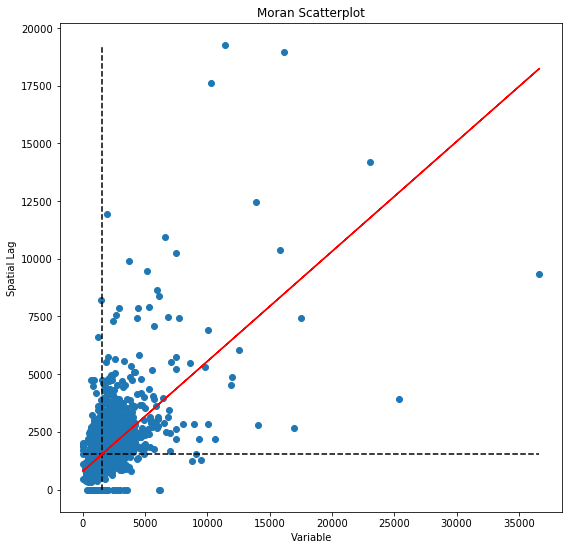

In [10]:
lag_val = lps.weights.lag_spatial(wq, y)
moran_scatterplot(y,lag_val)

In [11]:
spots = calculate_cluster(y,wq,bgy_gdf['WithNeighbors'])
spot_labels = [ '0 ns', '1 hot spot', '2 low outlier', '3 cold spot', '4 high outlier']
labels = [spot_labels[i] for i in spots]

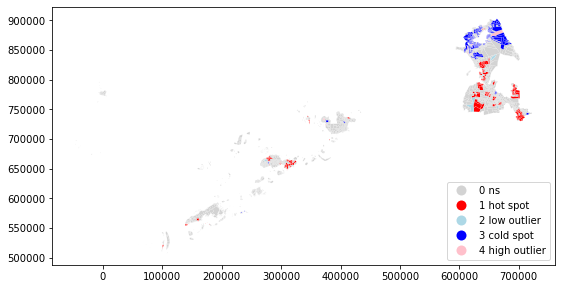

In [12]:
plot_cluster_map(bgy_gdf)

In [13]:
pop_cluster = pd.DataFrame(pop_gdf['Bgy_Code'])
pop_cluster['labels']=labels
pop_cluster.to_csv('output/region_wide_clusters.csv',index=False)
pop_cluster['labels'].value_counts()

0 ns              1683
3 cold spot        579
1 hot spot         189
2 low outlier       24
4 high outlier      15
Name: labels, dtype: int64

### Provincial Wide Spatial Analysis

Basilan
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 149, ' is an island (no neighbors)')
('WARNING: ', 166, ' is an island (no neighbors)')
('WARNING: ', 167, ' is an island (no neighbors)')
('WARNING: ', 174, ' is an island (no neighbors)')
('WARNING: ', 189, ' is an island (no neighbors)')
0.3265548743781144 0.001


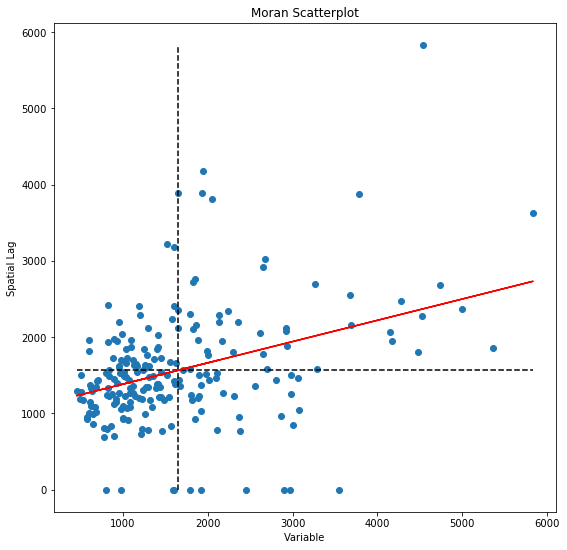

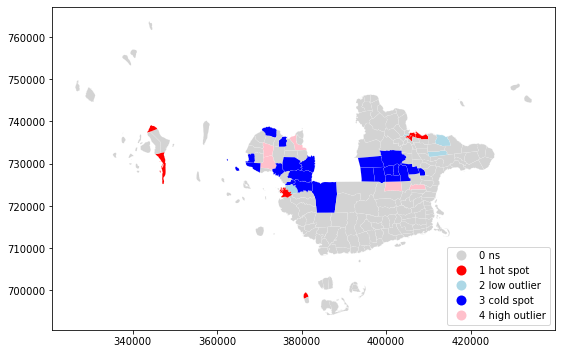

0 ns              167
3 cold spot        21
1 hot spot         13
4 high outlier      5
2 low outlier       4
dtype: int64



Lanao Del Sur
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 760, ' is an island (no neighbors)')
0.5349765690280036 0.001


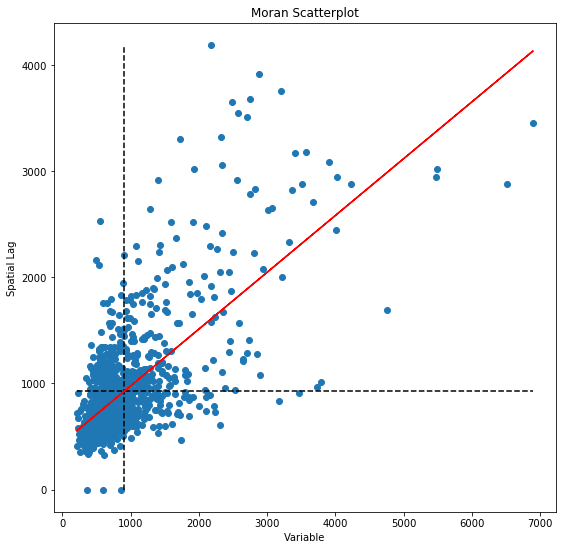

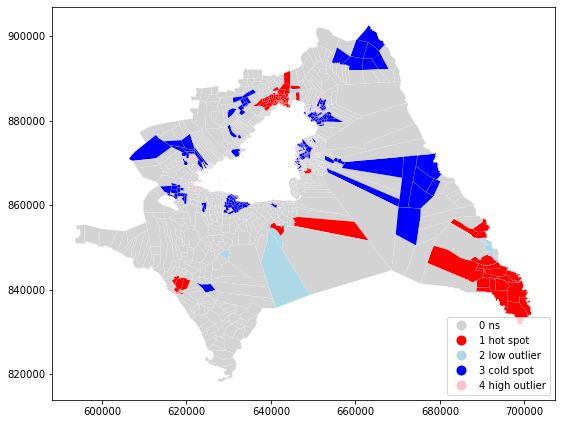

0 ns              860
3 cold spot       182
1 hot spot         93
2 low outlier      16
4 high outlier      8
dtype: int64



Maguindanao
0.2287226080877753 0.001


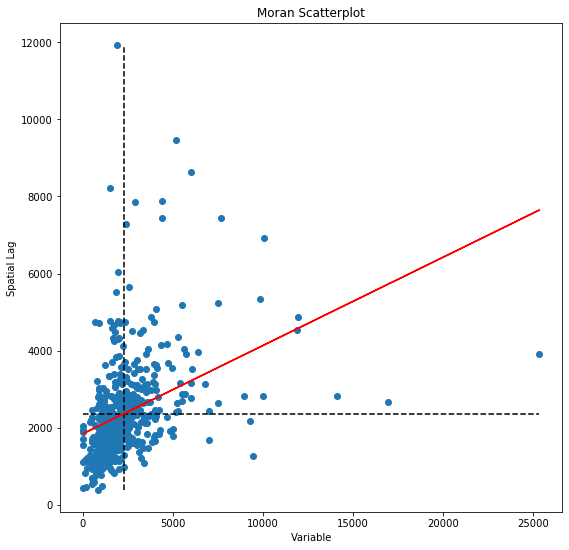

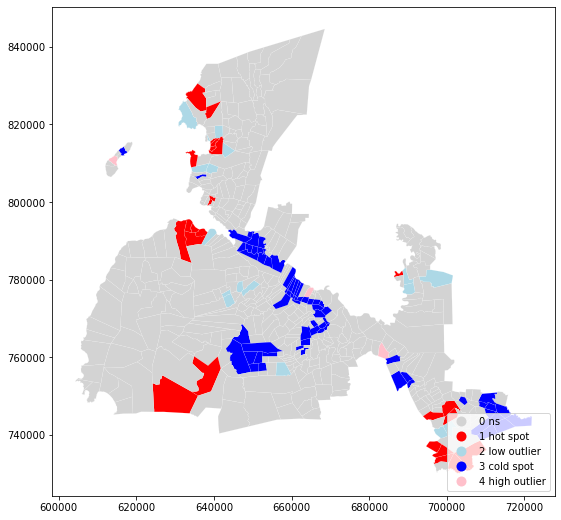

0 ns              394
3 cold spot        69
1 hot spot         25
2 low outlier      17
4 high outlier      3
dtype: int64



Sulu
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 228, ' is an island (no neighbors)')
('WARNING: ', 257, ' is an island (no neighbors)')
('WARNING: ', 280, ' is an island (no neighbors)')
('WARNING: ', 357, ' is an island (no neighbors)')
('WARNING: ', 360, ' is an island (no neighbors)')
('WARNING: ', 365, ' is an island (no neighbors)')
('WARNING: ', 394, ' is an island (no neighbors)')
0.5244423786284544 0.001


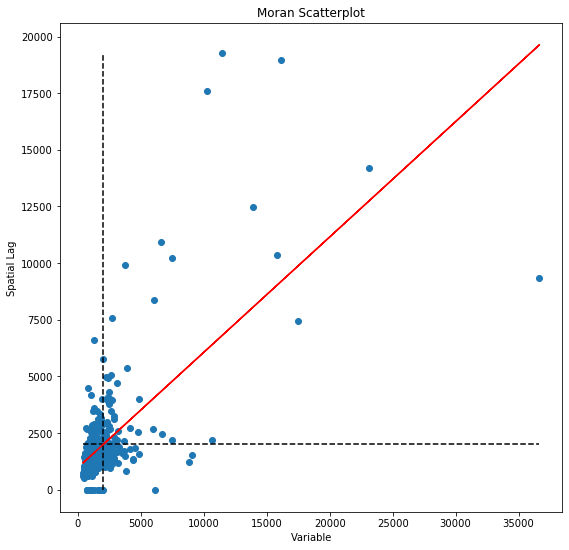

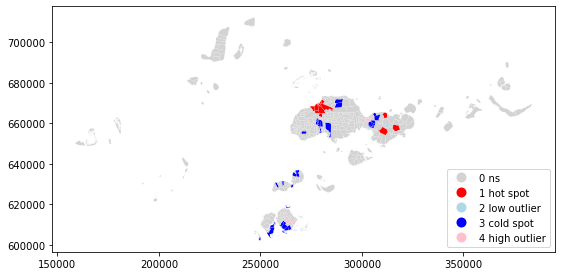

0 ns              342
3 cold spot        43
1 hot spot         18
4 high outlier      5
2 low outlier       2
dtype: int64



Tawi-Tawi
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 169, ' is an island (no neighbors)')
('WARNING: ', 195, ' is an island (no neighbors)')
0.5680675730282577 0.001


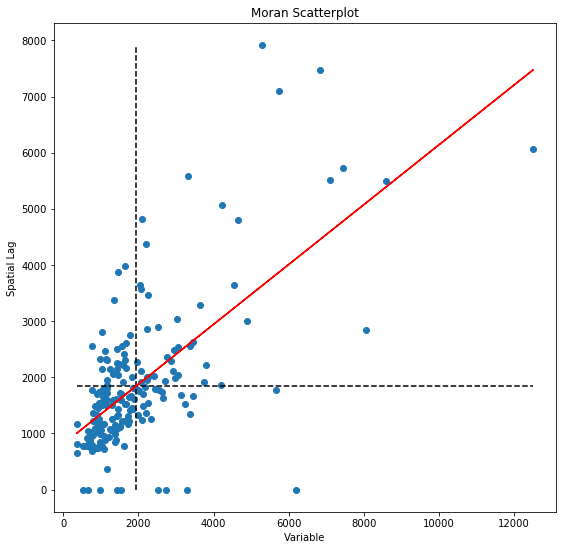

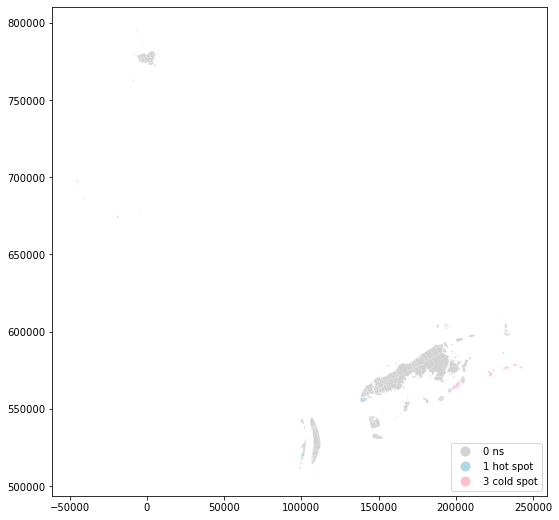

0 ns           163
3 cold spot     28
1 hot spot      12
dtype: int64





In [14]:
province_labels = []
for province in sorted(bgy_gdf['Pro_Name'].unique()):
    print(province)
    cond = bgy_gdf['Pro_Name']==province
    
    _df = pop_gdf[cond]
    
    wq =  lps.weights.Queen.from_dataframe(_df)
    wq.transform = 'r'

    _df['WithNeighbors'] = [1 if len(wq[index])>0 else 0 for index in wq.neighbors]
    
    y = _df['Pop2015']
    mi = esda.moran.Moran(y, wq)
    print(mi.I,mi.p_sim)
    
    lag_val = lps.weights.lag_spatial(wq, y)
    moran_scatterplot(y,lag_val)

    spots = calculate_cluster(y,wq,_df['WithNeighbors'])
    spot_labels = [ '0 ns', '1 hot spot', '2 low outlier', '3 cold spot', '4 high outlier']
    labels = [spot_labels[i] for i in spots]
    
    plot_cluster_map(_df)
    
    province_labels = province_labels + labels
    print(pd.Series(labels).value_counts())
    print('\n\n')

In [15]:
pop_gdf.to_file('output//BrgyLevel_Administrative_Boundaries.shp')

In [16]:
pop_gdf.shape

(2490, 6)

In [17]:
clusters = pop_gdf.drop(['geometry','Pop2015'],axis=1)
clusters['labels']=province_labels

In [18]:
clusters.to_csv('output/provincial_wide_clusters.csv',index=False)
clusters['labels'].value_counts()

0 ns              1926
3 cold spot        343
1 hot spot         161
2 low outlier       39
4 high outlier      21
Name: labels, dtype: int64